In [1]:
import pandas as pd
import numpy as np

In [2]:
news_data = pd.read_csv("C:\\Users\\Acer\\Downloads\\archive (34)\\abcnews-date-text.csv")
news_data.shape

(1244184, 2)

In [3]:
NUM_SAMPLES = 20000 # The number of sample to use

df = news_data.sample(NUM_SAMPLES, replace=False, random_state=42).reset_index(drop=True)


In [4]:
df.shape

(20000, 2)

In [5]:
df.head()

,publish_date,headline_text
0,20181017,virtual reality trial ahead of fire season in ...
1,20070131,farmers prepare for ec funding
2,20140810,the sunday inquisition august 10
3,20130221,news csg reax
4,20140806,rosetta spacecraft on final approach to comet ...


In [6]:
import nltk
import gensim
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from gensim import corpora, models
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))

def preprocess(doc):
    tokens = nltk.word_tokenize(doc.lower())
    return [token for token in tokens if token.isalpha() and token not in stop_words]

texts = [preprocess(doc) for doc in df['headline_text']]

# Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA Model with 6 topics
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=6,
    random_state=42,
    passes=15,
    alpha='auto',
    per_word_topics=True
)

In [8]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.008*"world" + 0.007*"rural" + 0.007*"cup" + 0.005*"support" + 0.005*"changes" + 0.005*"big" + 0.005*"house" + 0.005*"work" + 0.005*"gets" + 0.005*"union"
Topic 1: 0.015*"says" + 0.013*"us" + 0.012*"nsw" + 0.012*"govt" + 0.011*"council" + 0.008*"australian" + 0.007*"back" + 0.007*"wa" + 0.007*"may" + 0.006*"government"
Topic 2: 0.021*"new" + 0.010*"australia" + 0.009*"water" + 0.008*"health" + 0.008*"coast" + 0.007*"home" + 0.007*"coronavirus" + 0.006*"south" + 0.006*"group" + 0.006*"qld"
Topic 3: 0.028*"police" + 0.021*"man" + 0.013*"court" + 0.010*"fire" + 0.008*"death" + 0.008*"charged" + 0.008*"hospital" + 0.007*"crash" + 0.007*"sydney" + 0.007*"election"
Topic 4: 0.011*"day" + 0.010*"first" + 0.009*"one" + 0.008*"wins" + 0.008*"get" + 0.007*"test" + 0.007*"trial" + 0.006*"study" + 0.006*"change" + 0.005*"arrested"
Topic 5: 0.016*"interview" + 0.007*"national" + 0.007*"news" + 0.007*"abc" + 0.006*"iraq" + 0.006*"faces" + 0.005*"weather" + 0.005*"afl" + 0.005*"east" + 0.00

In [9]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.46037207117397944


In [10]:
topic_distributions = []
for bow in corpus:
    topic_dist = lda_model.get_document_topics(bow)
    topic_vector = np.zeros(6)
    for topic_num, prob in topic_dist:
        topic_vector[topic_num] = prob
    topic_distributions.append(topic_vector)

In [11]:
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(topic_distributions)

sil_score = silhouette_score(topic_distributions, labels)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.3552951559465392


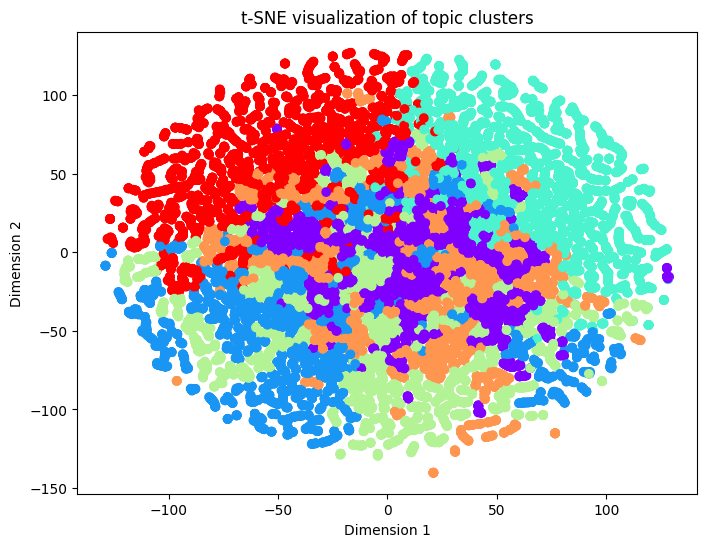

In [12]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert list to NumPy array
topic_distributions_np = np.array(topic_distributions)

# Run t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_values = tsne_model.fit_transform(topic_distributions_np)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(tsne_values[:,0], tsne_values[:,1], c=labels, cmap='rainbow')
plt.title("t-SNE visualization of topic clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


# BERTopic

In [13]:
!pip install bertopic


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
!pip install -U sentence-transformers

  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.0.1
    Uninstalling sentence-transformers-3.0.1:
      Successfully uninstalled sentence-transformers-3.0.1



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
import sentence_transformers

# Custom UMAP with random_state
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, nr_topics=6)
topics, probs = topic_model.fit_transform(df['headline_text'])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
print("\nTopics:")
for topic_num in topic_model.get_topic_freq().head(7).Topic:
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")



Topics:
Topic 0: [('to', 0.05735495271302691), ('for', 0.04352441011630311), ('in', 0.033903899640685894), ('on', 0.030718323043087813), ('the', 0.030462405885742245), ('of', 0.02908027520785), ('fire', 0.016996636624289237), ('at', 0.01677936131563341), ('interview', 0.016727539059847096), ('new', 0.01659640532293954)]
Topic -1: [('to', 0.05540205315452476), ('in', 0.04497117085683444), ('for', 0.040415364955430425), ('of', 0.03481272462850338), ('on', 0.027347168914923725), ('over', 0.026224860516185784), ('the', 0.023875971726862195), ('police', 0.021813377037115986), ('after', 0.01908444749581552), ('man', 0.017604113042799772)]
Topic 1: [('in', 0.06546619658921053), ('police', 0.050330132742113114), ('to', 0.05026510098711822), ('man', 0.045050472514653356), ('of', 0.03623336759413741), ('over', 0.0362190251017909), ('for', 0.03434148998286373), ('after', 0.030240155340836575), ('on', 0.02810558242166768), ('court', 0.027569923057997575)]
Topic 2: [('coronavirus', 0.1070436550156

In [22]:
def preprocess(doc):
    return [token.lower() for token in nltk.word_tokenize(doc) if token.isalpha()]

tokenized_docs = [preprocess(doc) for doc in df['headline_text']]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [23]:
topic_words = [ [word for word, _ in topic_model.get_topic(topic)] for topic in topic_model.get_topics().keys() if topic != -1 ]

coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("\nCoherence Score:", coherence_score)


Coherence Score: 0.33646184631049314


In [25]:
embeddings = topic_model.transform(df['headline_text'])[1]

# Convert None to zeros if any
embeddings = np.array([emb if emb is not None else np.zeros(embeddings[0].shape) for emb in embeddings])

# Get topic assignments
labels = np.array(topics)

In [30]:
import numpy as np

embeddings = np.array(embeddings)
print("Embeddings shape:", embeddings.shape)


Embeddings shape: (20000, 1)


In [31]:
valid_idx = labels != -1
if np.unique(labels[valid_idx]).shape[0] > 1:
    sil_score = silhouette_score(embeddings[valid_idx], labels[valid_idx])
    print("Silhouette Score:", sil_score)
else:
    print("Silhouette Score: Not enough distinct clusters for calculation.")

Silhouette Score: -0.4436603158252921


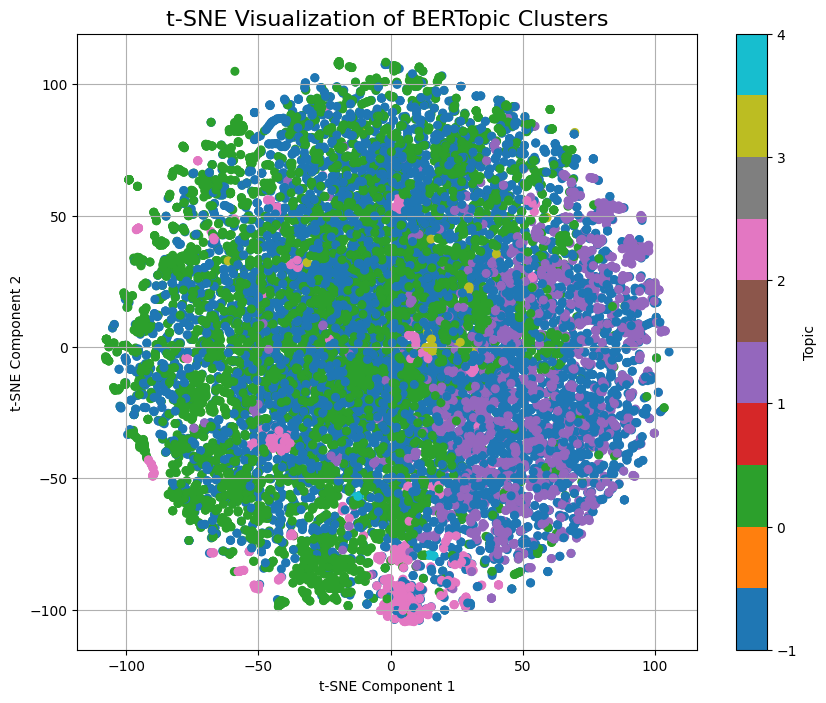

In [34]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🔹 Replace this with your real dataset
# df = pd.read_csv("your_data.csv")
docs = df['headline_text'].dropna().tolist()

# 🔹 Set up UMAP and HDBSCAN manually
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# 🔹 Create BERTopic with 6 topics
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, nr_topics=6)
topics, probs = topic_model.fit_transform(docs)

# 🔹 Get document embeddings for t-SNE
embeddings = topic_model.embedding_model.embed(docs)
embeddings = np.array(embeddings)

# ✅ Ensure embeddings are 2D and have enough samples/features
if embeddings.shape[0] >= 2 and embeddings.shape[1] >= 2:
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)
    tsne_embeddings = tsne_model.fit_transform(embeddings)

    # 🔹 Plot the clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=topics, cmap="tab10", s=30)
    plt.title("t-SNE Visualization of BERTopic Clusters", fontsize=16)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(label="Topic")
    plt.grid(True)
    plt.show()
else:
    print("❌ Not enough samples or features in embeddings to perform t-SNE.")


#lda & Bertopic

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📘 LDA Coherence Score: 0.452389375442993
📗 BERTopic Coherence Score: 0.3818978675175753
📊 BERTopic Silhouette Score: 0.0031359254


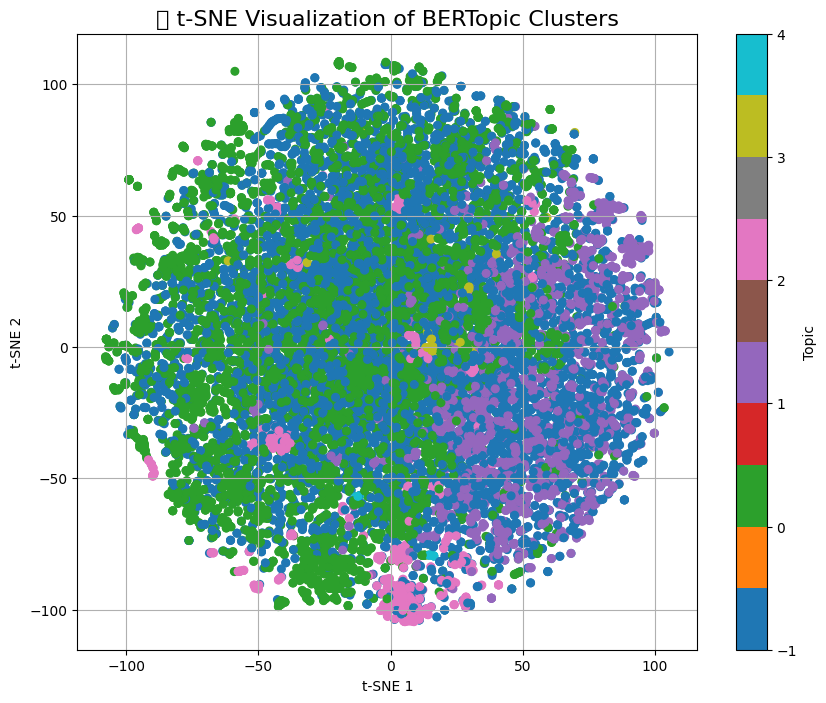

In [38]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# ----- Step 1: Prepare Data -----
 # Replace with your file
docs = df['headline_text'].dropna().astype(str).tolist()

stop_words = set(stopwords.words('english'))
tokenized_docs = [[word.lower() for word in word_tokenize(doc) if word.isalpha() and word.lower() not in stop_words] for doc in docs]

# ----- Step 2: LDA Topic Modeling -----
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=6, passes=10, random_state=42)

lda_topics = lda_model.show_topics(num_topics=6, formatted=False)
lda_coherence_model = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()

print("📘 LDA Coherence Score:", lda_coherence)

# ----- Step 3: BERTopic Modeling -----
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, nr_topics=6)
topics, probs = topic_model.fit_transform(docs)

# ----- Step 4: BERTopic Scores -----
# Coherence
bertopic_words = [ [word for word, _ in topic_model.get_topic(topic)] for topic in topic_model.get_topics().keys() if topic != -1 ]
bertopic_coherence_model = CoherenceModel(topics=bertopic_words, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
bertopic_coherence = bertopic_coherence_model.get_coherence()

print("📗 BERTopic Coherence Score:", bertopic_coherence)

# Silhouette Score
embeddings = np.array(topic_model.embedding_model.embed(docs))
labels = np.array(topics)

valid_idx = labels != -1
if embeddings.ndim == 2 and valid_idx.sum() >= 2 and len(np.unique(labels[valid_idx])) > 1:
    sil_score = silhouette_score(embeddings[valid_idx], labels[valid_idx])
    print("📊 BERTopic Silhouette Score:", sil_score)
else:
    print("⚠️ BERTopic Silhouette Score: Not enough valid clusters or samples.")

# ----- Step 5: Cluster Visualization (t-SNE) -----
if embeddings.shape[0] >= 2 and embeddings.shape[1] >= 2:
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)
    tsne_embeddings = tsne_model.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap='tab10', s=30)
    plt.title("🌀 t-SNE Visualization of BERTopic Clusters", fontsize=16)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.colorbar(label="Topic")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Not enough data for t-SNE visualization.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🧠 Hybrid Coherence Score: 0.4083306700990803
📈 Hybrid Silhouette Score (using BERTopic clusters): 0.0031359254


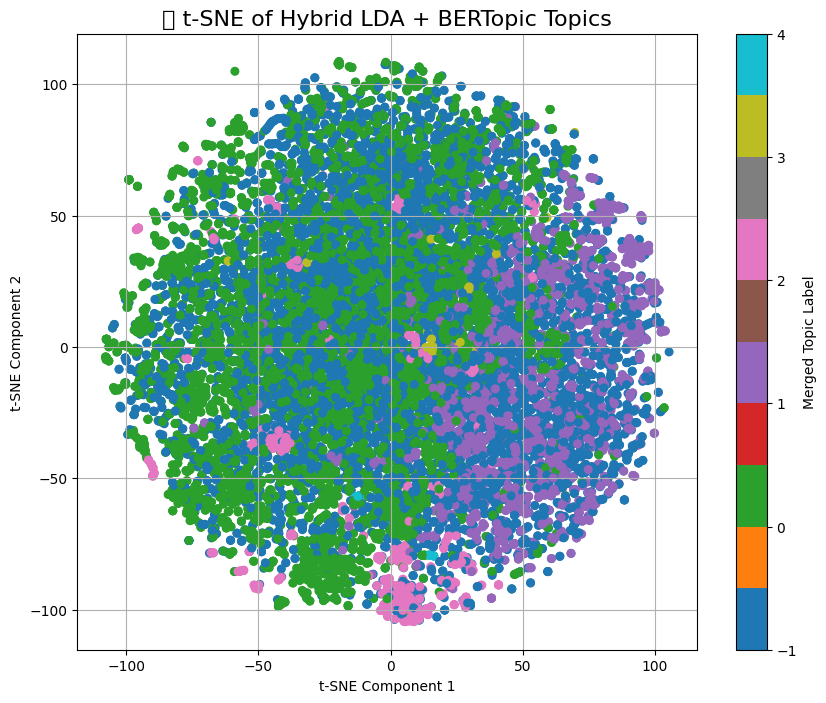

In [39]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# ----- Load & Clean -----
 # Replace with your dataset
docs = df['headline_text'].dropna().astype(str).tolist()

stop_words = set(stopwords.words('english'))
tokenized_docs = [[w.lower() for w in word_tokenize(doc) if w.isalpha() and w.lower() not in stop_words] for doc in docs]

# ----- LDA Topic Modeling -----
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=6, passes=10, random_state=42)
lda_topics = lda_model.show_topics(num_topics=6, formatted=False)
lda_topic_words = [[word for word, _ in topic] for topic_id, topic in lda_topics]

# ----- BERTopic Modeling -----
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=5, prediction_data=True)

bertopic_model = BERTopic(nr_topics=6, umap_model=umap_model, hdbscan_model=hdbscan_model)
topics, probs = bertopic_model.fit_transform(docs)
bertopic_topic_words = [
    [word for word, _ in bertopic_model.get_topic(topic_id)]
    for topic_id in bertopic_model.get_topics().keys() if topic_id != -1
]

# ----- Merge Topics: Hybrid Model -----
# Simple union of LDA and BERTopic words per topic index (assumes 6 topics from both)
merged_topics = []
for i in range(6):
    lda_words = set(lda_topic_words[i]) if i < len(lda_topic_words) else set()
    bertopic_words = set(bertopic_topic_words[i]) if i < len(bertopic_topic_words) else set()
    merged_topics.append(list(lda_words.union(bertopic_words)))

# ----- Coherence Score for Merged Topics -----
coherence_model = CoherenceModel(topics=merged_topics, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("🧠 Hybrid Coherence Score:", coherence_score)

# ----- Silhouette Score -----
embeddings = np.array(bertopic_model.embedding_model.embed(docs))
labels = np.array(topics)

valid_idx = labels != -1
if valid_idx.sum() >= 2 and len(np.unique(labels[valid_idx])) > 1:
    silhouette = silhouette_score(embeddings[valid_idx], labels[valid_idx])
    print("📈 Hybrid Silhouette Score (using BERTopic clusters):", silhouette)
else:
    print("⚠️ Not enough distinct clusters for silhouette score.")

# ----- Cluster Visualization -----
if embeddings.shape[0] >= 2 and embeddings.shape[1] >= 2:
    tsne_model = TSNE(n_components=2, perplexity=5, random_state=42)
    tsne_embeddings = tsne_model.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, cmap='tab10', s=30)
    plt.title("🔍 t-SNE of Hybrid LDA + BERTopic Topics", fontsize=16)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(label="Merged Topic Label")
    plt.grid(True)
    plt.show()
else:
    print("⚠️ Not enough data for t-SNE visualization.")
